# Similitud con Gensim

### Referencias
* https://www.kaggle.com/rtatman/pretrained-word-vectors-for-spanish
* Cristian Cardellino: Spanish Billion Words Corpus and Embeddings (March 2016), https://crscardellino.github.io/SBWCE/

In [1]:
import spacy
import numpy as np
import pandas as pd

spa_lex = spacy.load('es_core_news_md')

In [2]:
import warnings
warnings.filterwarnings("ignore")
from pprint import pprint

## Documentos
Es el arreglo de todas las repeticiones diferentes de las master rows mas frecuentes evaluadas a 3

In [3]:
documents = [
    'que es un hermano que grita mucho, mas de lo normal :v',
    'que es una persona gritona',
    'porque el nino grita mucho',
    'es muy griton',
    'que grita todo el tiempo',
    'que su hermano es un griton',
    'se refiere a que el hermano grita y el poeta ve a mundo como pelotas',
    'porque talves su hermano grita mucho',
    'por el grita',
    'que su hermano puede gritar por que no tiene una pelota de pelos',
    'que su hermano es una pelota que grita',
    'que grita mucho',
    'que abla mucho o grita',
    'que la nina sela pasa llorando o asiendo berrinche :v',
    'por que grita mucho',
    'por que grita',
    'mi hermanito grita mucho',
    'es gordito y grita mucho',
    'que hay muchos gritos',
    'que exagera al hacer berrinche',
    'que llora mucho  :v',
    'que mi hermanito no para de gritar',
    'que su hermano grita mucho',
    'que su hermano es alguien que grita mucho',
    'qu su hermano se la pasa gritando osea es un desastroso',
    'explica que el hermano grita mucho e inquieto',
    'es griton',
    'que su hermanito es gordo y grita mucho',
    'se refiere a que el hermanito siempre grita',
    'por que su hermano solo grita',
    'que su hermano chico grita mucho o habla mucho',
    'que grita, o llora mucho por eso es una pelota de gritos',
    'que su hermano no se para de quejar a cada rato anda gritando',
    'que es un nino que grita mucho ',
    'por que el grita',
    'grita mucho',
    'que grita mucho ',
    'que tu hermano grita mucho y me desespera creo que eso dice la frase de pelota de gritos supongo',
    'que el siempre grita',
    'de que el hermano nada mas se la pasa gritando y eso molesta ',
    'que su hermano grita todo el tiempo ',
    'porque grita mucho',
    'que es un griton',
    'que grita mucho',
    'por que esta gordo y gita',
    'que su hermanito grita mucho',
    'por que gryta mucho mi ermanito',
    'por que mi hermanito grita mucho',
    'que su hermano grita mucho',
    'mi hermanito es un nino de gritos',
    'mi hermano es muy griton',
    'que es alguien muy griton',
    'que su hermano es una persona que grita mucho',
    'por que grita mucho y salta mucho',
    'tal vez por que es algo griton y molesto',
    'significa que reclama o llora mucho',
    'que el hermanito grite mucho',
    'que se unde en el llanto',
    'que su hermano grita mucho todo el tiempo',
    'que su hermanito grita mucho',
    'poequ es bien griton',
    'por que siempre grita',
    'por que grita mucho',
    'por que llora mucho',
    'es un nino que se la pasa gritando y llorando todo el dia',
    'por que chillan mucho o gritan mucho exageran',
    'por que se la pasa gritando',
    'porque grita mucho',
    'su hermano es un nino que grita mucho',
    'puen que su hermana grita mucho',
    'que grita mucho',
    'porque grita mucho',
    'mi hermano grita mucho',
    'que grita demasiado',
    'que grita ',
    'que mi hermano grita mucho',
    'que su hermano grita mucho.',
    'se refiere a  que es una persona que grita ',
    'que su hermano hace mucho escandalo ',
    'que hecha mucho relajo',
    'que grita demasiado',
    'que el hermano se la pasa gritando',
    'que hace mucho escandalo',
    'que siempre se la pasa gritando ',
    'que es gordito y grita mucho',
    'que siempre grita',
    'mi hermanito es gordito y es griton',
    'que grita',
    'que su hermano siempre esta gritando.',
    'que no para de gritar',
    'que su hermano grita mucho y no sale de su circulo',
    'un humano gordo que no para de chillar ',
    'que grita mucho ',
    'que su hermano se la pasa gritando ',
    'que grita mucho, que da mucha lata',
    'mi hermano grita',
    'quiere decir que su hermano grita mucho',
    'pues que grita mucho y tal vez al hablar grita.',
    'que el nino es un nino que grita mucho',
    'que el hermano grita como una pelota que esta botando ',
    'es alguien que grita o habla demasiado',
    'que siempre grita',
    'de que su hermano o es un quejumbroso o es un lloron ',
    'que se la pasa gritando ',
    'que todo el dia esta hablando y grtando',
    'porque grita demasiado',
    'que grita mucho',
    'que el hermano siempre esta gritando entonces es un conjunto de gritos.',
    'solo grita',
    'que grita mucho ',
    'que me hermano grita mucho',
    'mi hermano es un griton',
    'que su hermano grita o hace mucho ruido',
    'que grita mucho',
    'por que grita mucho',
    'que grita mucho',
    'que siempre esta gritando.',
    'que o se mueve mucho porque es una pelota o que es muy ruidoso.',
    'que su hermano esta chiquito y grita mucho',
    'que mi hermano grita mucho',
    'significa que es una nino muy chillon y que normalmente se desespera y grita',
    'que tu hermano grita mucho y esta gordo',
    'que su hermano es muy griton',
    'que grita mucho',
    'quiere decir que su hermano es un nino que grita',
    'que grita en exceso ',
    'mi hermano es alguien que no para de gritar y hablar',
    'que su hermanito es un griton y llora todo el dia como la llorona',
    'alguien que grita',
    'que tu hermano grita mucho',
    'que tu hermano grita mucho',
    'que grita mucho',
    'porque no deja de gritar',
    'que hace mucho escandalo y no se puede quedar quieto',
    'es un ser que grita mucho',
    'que esta muy irritanto',
    'que su hermano es gordito y redondo y esta constantemente gritando ',
    'es una machina a gritar',
    'su hermano grita mucho',
    'mi hermano grita mucho',
    'que nunca deja de hablar',
    'que es un nino gordito que se la pasa gritando',
    'que los ninos son demasiados inquietos y ruidosos',
    'que su hermanito grita mucho',
    'que su hermando es un nino travieso',
    'que su hermano grita mucho.',
    'es decir que tu hermanito es un griton',
    'que siempre esta llorando o gritando',
    'que es un dolor de cabeza',
    'que todo el tiempo grita mucho',
    'que siempre hace berrinche y grita para tener lo que quiere',
    'que es un nino muy inquieto',
    'quiere decir que su hermanito grita mucho',
    'que mi hermano le encanta cantar',
    'que grita mucho todo el tiempo',
    'por que esta gordito y es muy griton',
    'por que son muy ruidosos.',
    'que grita mucho',
    'que su hermano grita mucho',
    'que el hermanito es muy ruidoso',
    'mi hermanito me estresa cada bes que grita.',
    'que su hermanito grita mucho',
    'que un nino es muy ruidoso',
    'que mi ermano grita mucho',
    'su hermano grita o llora mucho y asi es como la autor@ se refiere a el en el sentido literario',
    'por que siempre  grita',
    'por que los ninos pequenos por lo regular gritan por todo',
    'que es un bb',
    'que siempre grita',
    'que mi hermanito grita mucho',
    'al hermano lo  representa  como una pelota y el grita mucho',
    'porque el grita mucho o muy fuerte',
    'que todo el tiempo llora y grita',
    'mi hermano es una persona que grita todo el tiempo',
    'mi hermanito grita mucho',
    'mi hermano grita demasiado',
    'que es muy inquieto',
    'q asu hermano le gustan los grillos alv',
    'por que grita mucho',
    'que mi hermono grita mucho',
    'por que es gordo y le gusta cantar',
    'quiere decir que su hermano grita mucho',
    'que grita demasiado',
    'que mi hermano grita y grita sin parar y sin sentido',
    'que los ninos son muy energeticos y tienden a gritar mucho.',
    'osea que su hermano grita mucho',
    'que mi hermanito es muy griton',
    'por que grita mucho',
    'se refiere a que su hermano es una persona gritona',
    'quiere decir que los ninos gritan mucho ',
    'que es bien gritano',
    'su hermano es un bebe que grita y llora mucho',
    'que  esta gritando su hermano ',
    'que el hermanito grita mucho',
    'que mi hermanito siempre grita',
    'que su hermano siempre grita',
    'quiere decir que su hermano grita mucho, es una metafora',
    'lo que yo entiendo es que su hermano grita mucho y a eso se refiere.',
    'se refiere a que su hermano grita mucho',
    'quiere decir que su hermano grita mucho.',
    'que su hermano es muy lloron y enojon y de todo grita',
    'que es una persona que grita mucho',
    'cuando a alguien se le dice pelota, la mayoria de veces es porque tratan de decirle gordo/a asi que supongo que trata de decir que su hermano es un gordo griton  ',
    'que es una persona inquieta',
    'porque grita mucho ',
    'que siempre que se mueve hace demasiado ruido',
    'que con cualquier cosa se altera y grita',
    'que mi hermanito grita mucho en casa ',
    'pues ami entender, la persona se esta haciendo una referencia de la pelota con su hermano, que es inquieto, entre otras cosas.',
    'que a mi hermano le gusta gritar o hablar mucho y muy fuerte',
    'que es muy fastidioso',
    'grita mucho ',
    'por que los ninos gritan cuando estan pequenos',
    'que el hermano grita mucho ',
    'siempre grita',
    'quiere decir que el nino es muy griton cuando juega la pelota ',
    'grita mucho',
    'que el nino grita mucho y este se expresa mas comun  de esta forma ',
    'por que quiere decir que el hermano es muy griton ',
    'que grita mucho',
    'que grita mucho y el piensa que es una pelota',
    'que esta gordito y se la pasa gritando ',
    'que se la pasa gritando',
    'que el tiene la peota y no se la quieren dar y grita',
    'que mi hermanito es muy griton',
    'que mi hermano grita mucho',
    'que grita mucho mi hermano',
    'quiere decir que mi hermanito grita demasiado ',
    'mi hermano grita muho como bota una pelota',
    'que grita mucho',
    'se la pasa gritando',
    'que su hermano grita mucho',
    'que su hermano grita mucho',
    'mi hermano es muy griton,escandaloso y travieso',
    'que mi hermano siempre esta gritando',
    'que su hermano es un nino super griton',
    'que los hermanos te pueden molestar o normalmente te peleas con ellos',
    'mi hermano cada vez que grita se vuelve muy constante',
    'un nino que siempre trata de llamar la atencion con gritos.',
    'que su hermano grita mucho',
    'que su hermanito grita mucho.',
    'que es un nino gordito como pelota que grita mucho',
    'que es muy griton',
    'que se altera rapido',
    'que siempre grita por todo',
    'mi hermanito en un nino que grita mucho',
    'que su hermano grita mucho',
    'que siempre grita mucho',
    'que el nunca deja de gritar',
    'simplemente que su hermano es una persona muy gritona, pelota se refiere a cabeza.',
    'que esta gordo y le gusta gritar',
    'mi hermano grita por todo',
    'que los ninos pueden hacer mucho ruido',
    'es muy ruidoso',
    'por que grita a cada rato',
    'que grita mucho',
    'por que siempre esta gritando',
    'que su hermano se la pasa gritando',
    'que es una persona muy reganona y grita',
    'que para mi es muy latoso',
    'mi hermano grita mucho',
    'q mi hermanito es muy griton en forma de pelota',
    'que siempre esta gritando',
    'que el hermano es muy expresivo',
    'que llora mucho',
    'que grita mucho ',
    'que siempre anda brincando y gritando',
    'que su hermano grita mucho',
    'el nino grita mucho o habla de mas ',
    'que su hermanito grita mucho',
    'es una persona gordita que grita ',
    'se refiere a que su hermano es muy inquieto.',
    'que el nino es muy griton',
    'que es una persona que siempre grita.',
    'puede ser que el hermanito este pequeno y nunca deja de llorar y gritar por todo lo que le hacen o le pasa.',
    'porque no para de gritar o de molestar',
    'que su hermano grita mucho.',
    'una persona gorda  que grita mucho',
    'que grita por todo, cada que rebota',
    'porque el grita mucho',
    'que por cualquier cosa llora y grita',
    'que se la pasa gritando.',
    'talvez que sienpre esta corriendo o no se esta empaz',
    'porque esta chiquito grita mucho',
    'que es un nino muy griton',
    'es un nino muy griton ',
    'su hermano grita todo el tiempo y es una pelota porque se esta ocupando como una alternativa',
    'mi hermano es muy escandaloso ',
    'que a cada rato esta gritando ',
    'que grita mucho ',
    'por que nose calla ',
    'que tu hermano grita mucho ',
    'que grita mucho',
    'su hermano solo grita ',
    'esta lleno de gritos',
    'llora o grita mucho',
    'describe como es el hermano,quiere decir   que grita mucho',
    'que solo grita mucho',
    'que grita mucho',
    'que su hermano menor grita mucho ',
    'que esta lleno de gritos listos para salir',
    'que es muy escandaloso o ruidoso ',
    'porque tal vez tu hermano es un griton y es lo unico que hace',
    'significa que es una persona que grita demasiado',
    'significa que su hermano es muy escandaloso',
    'se refiere a que su hermano siempre grita',
    'que su hermano grita mucho ',
    'que su hermano grita mucho ',
    'que al ser pequeno llora y grita mucho ',
    'que grita mucha probablemente porque es menor',
    'que su hermano es muy griton ',
    'un nino gordo que hace mucho ruido',
    'que siempre esta gritando ',
    'pq se espanta muy facil y salta al mismo tiemmpo que gfrita',
    'que grita muy fuerte  y grita todo el tiempo.',
    'que su hermano tiende a gritar mucho',
    'que se refieren a que la pelota representa su hermano y como su hermano grita mucho esa es la accion que representa a su hermano',
    'su hermano debe ser un nino pequeno, y por lo general los  ninos pequenos gritan cuando hacen berrinches. tambien puede ser un bebe su hermano y pues los bebes lloran. ',
    'porque esta gordo y grita demasiado ',
    'que su hermano no deja de gritar',
    'gritan mucho',
    'que grita demaciado',
    'que el nino grita mucho tiempo continuo.',
    'significa que su hermano llora y gritos mucho',
    'que su hermano es muy griton',
    'que se grita siempre llora y grita.',
    'que su hermano es muy desastroso, que grita mucho ',
    'que el hermano del autor es alguien que se expresa mucho y de manera demandante.',
    'su hermano se grita y trata como pelota(salta, bota)',
    'que el hermano grita mucho. ',
    'el molesta facilmente',
    'su hermano grita mucho',
    'que su hermano grita mucho ',
    'quiere decir que siempre pega gritos',
    'una persona que grita',
    'el hermano que grita.',
    'que es alguien que no para de gritar',
    'quiere decir que los hermanos se gritan y lloran porque son menores en las casas, y se comparo en una pelota.',
    'that maybe her sister always screams to her ',
    'que es un bebe que grita mucho',
    'que siempre esta gritando ',
    'que no deja de gritar',
    'mi hermanito grita mucho.',
    'puede significar que el hermano es ruidoso.',
    'que grita mucho',
    'esta usando la palabra pelota para todo, asi ue podemos pensar que su hermanito simplemente es muy griton ',
    'es un nino que grita mucho '
    ]

## Funciones

In [4]:
# Funciones para eliminar caracteres especiales
def evalChar(x):
    if x in [",",".",":",";","`","'",'"',"(",")","-","_","~","/","?","¿","=","[","]","\n","\r","@"]:
        x = ""
    return x

def cleanString(x):
    s = map(evalChar, x)
    s = "".join(list(s))
    return s

def clean_documents(documents):
    """Funcion para eliminar stopwords y signos de puntuacion de un corpus"""
    clean_documents = []
    
    for sentence in documents: # remover stopwords y signos de puntuacion
        sentence_list = []
        clean_sentence_list = []
        doc = spa_lex(sentence)
        for token in doc:
            # CRITERIO DE CLASIFICACION DE STOPWORD
            if token.is_stop or token.is_punct or token.is_quote or len(token) == 1:
                pass # stopword
            else:
                sentence_list.append(str(token))
        for token in sentence_list:
            clean_token = cleanString(token)
            clean_token = clean_token.strip()
            clean_sentence_list.append(token)
        clean_documents.append(clean_sentence_list)
        
    return clean_documents

## Preprocesamiento de documentos
Empezamos limpiando los documentos limpios

In [5]:
# imports requeridos
from gensim import corpora
from gensim import models
from gensim import similarities

In [6]:
# eliminar las stopwords, signos de puntuacion y tokenizar el corpus original
clean_documents = clean_documents(documents)

In [7]:
pprint(clean_documents)

[['hermano', 'grita', 'normal'],
 ['persona', 'gritona'],
 ['nino', 'grita'],
 ['griton'],
 ['grita'],
 ['hermano', 'griton'],
 ['refiere', 'hermano', 'grita', 'poeta', 've', 'mundo', 'pelotas'],
 ['talves', 'hermano', 'grita'],
 ['grita'],
 ['hermano', 'gritar', 'pelota', 'pelos'],
 ['hermano', 'pelota', 'grita'],
 ['grita'],
 ['abla', 'grita'],
 ['nina', 'sela', 'pasa', 'llorando', 'asiendo', 'berrinche'],
 ['grita'],
 ['grita'],
 ['hermanito', 'grita'],
 ['gordito', 'grita'],
 ['gritos'],
 ['exagera', 'berrinche'],
 ['llora'],
 ['hermanito', 'gritar'],
 ['hermano', 'grita'],
 ['hermano', 'alguien', 'grita'],
 ['qu', 'hermano', 'pasa', 'gritando', 'osea', 'desastroso'],
 ['explica', 'hermano', 'grita', 'inquieto'],
 ['griton'],
 ['hermanito', 'gordo', 'grita'],
 ['refiere', 'hermanito', 'grita'],
 ['hermano', 'grita'],
 ['hermano', 'chico', 'grita'],
 ['grita', 'llora', 'pelota', 'gritos'],
 ['hermano', 'quejar', 'rato', 'anda', 'gritando'],
 ['nino', 'grita'],
 ['grita'],
 ['grita']

Generamos un diccionario con la distribucion de frequencias de todas las palabras

In [8]:
dictionary = corpora.Dictionary(clean_documents)

In [9]:
print(dictionary)
print('\n')
pprint(dictionary.token2id)

Dictionary(214 unique tokens: ['grita', 'hermano', 'normal', 'gritona', 'persona']...)


{'  ': 174,
 'abla': 16,
 'accion': 187,
 'alguien': 28,
 'altera': 129,
 'alternativa': 169,
 'alv': 111,
 'always': 202,
 'ami': 132,
 'anda': 37,
 'asiendo': 17,
 'asu': 112,
 'atencion': 152,
 'autor': 194,
 'autor@': 103,
 'bb': 108,
 'bebe': 121,
 'bebes': 189,
 'berrinche': 18,
 'berrinches': 190,
 'bes': 100,
 'bota': 143,
 'botando': 69,
 'brincando': 159,
 'cabeza': 96,
 'calla': 171,
 'cantar': 98,
 'casa': 131,
 'casas': 199,
 'chico': 36,
 'chillan': 55,
 'chillar': 65,
 'chillon': 79,
 'chiquito': 78,
 'circulo': 63,
 'comparo': 200,
 'comun': 137,
 'conjunto': 74,
 'constante': 150,
 'constantemente': 87,
 'continuo': 193,
 'corriendo': 165,
 'cosa': 130,
 'decirle': 125,
 'deja': 83,
 'demaciado': 192,
 'demandante': 195,
 'demasiados': 90,
 'desastroso': 29,
 'describe': 175,
 'desespera': 40,
 'dolor': 97,
 'empaz': 166,
 'encanta': 99,
 'energeticos': 118,
 'enojon': 124,
 'enten

Vectorizamos todos los documentos en el corpus limpio (Bag of Words)

_The first entry in each tuple corresponds to the ID of the token in the dictionary, the second corresponds to the count of this token in the doc._

In [10]:
vectors = [ dictionary.doc2bow(clean_documents[doc_id]) for doc_id in range(len(clean_documents)) ]
pprint(vectors)

[[(0, 1), (1, 1), (2, 1)],
 [(3, 1), (4, 1)],
 [(0, 1), (5, 1)],
 [(6, 1)],
 [(0, 1)],
 [(1, 1), (6, 1)],
 [(0, 1), (1, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)],
 [(0, 1), (1, 1), (12, 1)],
 [(0, 1)],
 [(1, 1), (13, 1), (14, 1), (15, 1)],
 [(0, 1), (1, 1), (15, 1)],
 [(0, 1)],
 [(0, 1), (16, 1)],
 [(17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1)],
 [(0, 1)],
 [(0, 1)],
 [(0, 1), (23, 1)],
 [(0, 1), (24, 1)],
 [(25, 1)],
 [(18, 1), (26, 1)],
 [(27, 1)],
 [(13, 1), (23, 1)],
 [(0, 1), (1, 1)],
 [(0, 1), (1, 1), (28, 1)],
 [(1, 1), (21, 1), (29, 1), (30, 1), (31, 1), (32, 1)],
 [(0, 1), (1, 1), (33, 1), (34, 1)],
 [(6, 1)],
 [(0, 1), (23, 1), (35, 1)],
 [(0, 1), (10, 1), (23, 1)],
 [(0, 1), (1, 1)],
 [(0, 1), (1, 1), (36, 1)],
 [(0, 1), (15, 1), (25, 1), (27, 1)],
 [(1, 1), (30, 1), (37, 1), (38, 1), (39, 1)],
 [(0, 1), (5, 1)],
 [(0, 1)],
 [(0, 1)],
 [(0, 1)],
 [(0, 1), (1, 1), (15, 1), (25, 1), (40, 1), (41, 1), (42, 1)],
 [(0, 1)],
 [(1, 1), (21, 1), (30, 1), (43, 1)],
 [(0, 

Creamos la interfaz de similitud

In [14]:
lsi = models.LsiModel(vectors, id2word=dictionary, num_topics=2)

index = similarities.MatrixSimilarity(lsi[vectors])  # transform corpus to LSI space and index it

print(lsi)
print(index)

LsiModel(num_terms=214, num_topics=2, decay=1.0, chunksize=20000)
MatrixSimilarity<347 docs, 2 features>


Instanciamos el documento que queremos comparar

In [15]:
doc_slave = "que cuando le pegan el se pone a gritar"
vec_bow_slave = dictionary.doc2bow(doc_slave.lower().split())
vec_lsi_slave = lsi[vec_bow_slave]  # convert the query to LSI space
print(vec_lsi_slave)

[(0, 0.011597138750097314), (1, 0.056378860803080966)]


Ejecutamos la similitud

In [16]:
sims = index[vec_lsi_slave]  # perform a similarity query against the corpus
print(list(enumerate(sims)))  # print (document_number, document_similarity) 2-tuples
sims = sorted(enumerate(sims), key=lambda item: -item[1])
for i, s in enumerate(sims):
    print(s, documents[i])

[(0, 0.41345087), (1, 0.44781274), (2, -0.30957896), (3, 0.999997), (4, -0.32303298), (5, 0.9499921), (6, 0.43583733), (7, 0.4134519), (8, -0.32303298), (9, 0.9401849), (10, 0.45720303), (11, -0.32303298), (12, -0.32614666), (13, 0.9997909), (14, -0.32303298), (15, -0.32303298), (16, -0.3984476), (17, -0.3145916), (18, 0.91118664), (19, -0.6904034), (20, -0.37336063), (21, -0.58051366), (22, 0.41197744), (23, 0.4273217), (24, 0.96319205), (25, 0.42746705), (26, 0.999997), (27, -0.37740138), (28, -0.35458183), (29, 0.41197744), (30, 0.41345412), (31, -0.20038447), (32, 0.95645314), (33, -0.30957896), (34, -0.32303298), (35, -0.32303298), (36, -0.32303298), (37, 0.47478878), (38, -0.32303298), (39, 0.9627958), (40, 0.41197744), (41, -0.32303298), (42, 0.999997), (43, -0.32303298), (44, 0.85855246), (45, -0.3984476), (46, 0.98404545), (47, -0.3984476), (48, 0.41197744), (49, -0.5462713), (50, 0.9499921), (51, 0.99734586), (52, 0.40118885), (53, -0.32619643), (54, 0.9999996), (55, -0.15353

## Modelo Gensim
Empezamos con los documentos limpios

In [10]:
# imports requeridos
from gensim.models import Word2Vec
import multiprocessing
from matplotlib import pyplot as plt

cores = multiprocessing.cpu_count()
print(cores)

12


Creamos el modelo

In [21]:
model = Word2Vec(clean_documents)
print(model)

Word2Vec(vocab=22, size=100, alpha=0.025)


In [34]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['grita'])

['hermano', 'grita', 'persona', 'nino', 'griton', 'refiere', 'gritar', 'pelota', 'pasa', 'hermanito', 'gordito', 'gritos', 'llora', 'alguien', 'gritando', 'inquieto', 'gordo', 'significa', 'gritan', 'ruidoso', 'deja', 'ninos']
[-3.1585032e-03  4.2143320e-03  1.1693300e-03  1.9344722e-03
  3.7108192e-03 -3.7047049e-04  4.2550354e-03  4.9212370e-03
 -4.7923415e-03 -7.3502067e-04 -4.1332473e-03  1.3724260e-03
 -4.2802264e-04  1.2639710e-03  2.7508710e-03 -2.5314474e-03
  1.3235480e-03  2.4009584e-03 -2.1746298e-03 -2.3305626e-03
  3.6341124e-03 -4.0476671e-03  1.5807849e-03 -1.7984325e-04
  3.7222437e-03 -3.0108425e-03 -1.2159289e-03 -4.1078241e-03
 -3.0578072e-03 -3.6366279e-03  4.8704213e-03 -1.9006708e-03
  2.4807674e-03 -1.5778070e-03 -4.4475812e-03  2.2567101e-03
 -2.0341028e-03 -2.8045995e-03  2.6877960e-03  5.9689372e-04
  4.0143081e-03 -4.1275388e-03  3.5156268e-03 -3.5715112e-03
 -3.2928633e-03 -3.7963733e-03 -3.7132844e-04 -4.4980068e-03
 -2.0290909e-03  2.6304196e-03  2.1966619

<ipython-input-34-87f8f30e63b3>:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model['grita'])


Ploteamos los resultados

In [30]:
from sklearn.decomposition import PCA

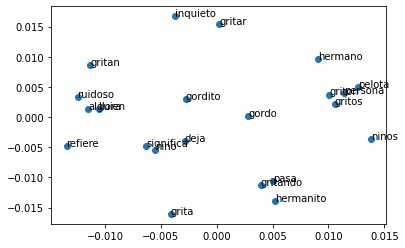

In [37]:
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

## Entrenamiento modelo Gensim Word2Vec
Apartir del arreglo de documentos empezaremos a entrenar el modelo

#### Parametros de model
* size
    * The size of the dense vector to represent each token or word (i.e. the context or neighboring words). If you have limited data, then size should be a much smaller value since you would only have so many unique neighbors for a given word. If you have lots of data, it’s good to experiment with various sizes. A value of 100–150 has worked well for me for similarity lookups.

* window
    * The maximum distance between the target word and its neighboring word. If your neighbor’s position is greater than the maximum window width to the left or the right, then, some neighbors would not be considered as being related to the target word. In theory, a smaller window should give you terms that are more related. Again, if your data is not sparse, then the window size should not matter too much, as long as it’s not overly narrow or overly broad. If you are not too sure about this, just use the default value.

* min_count
    * Minimium frequency count of words. The model would ignore words that do not satisfy the min_count. Extremely infrequent words are usually unimportant, so its best to get rid of those. Unless your dataset is really tiny, this does not really affect the model in terms of your final results. The settings here probably has more of an effect on memory usage and storage requirements of the model files.

* workers
    * How many threads to use behind the scenes?

* iter
    * Number of iterations (epochs) over the corpus. 5 is a good starting point. I always use a minimum of 10 iterations.

#### Metodos de wv (word vectors del modelo)

In [ ]:
"""

---> Extraer vocabulario
wv.vocab

---> Obtener vectores de una palabra o arrojar error en caso de que la palabra no exista
try:
    palabra = "palabra"
    vec = wv[palabra]
except KeyError:
    print(f"La palabra {palabra} no aparece en este modelo.")
    
---> Obtener la palabra que no pertenece al arreglo
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

"""

In [11]:
model = Word2Vec(
    clean_documents,
    size=150,
    window=10,
    min_count=2,
    workers=8,
    iter=10)

In [13]:
# Las mas similares
model.wv.most_similar(positive="persona")

[('bebe', 0.2018008828163147),
 ('llora', 0.19554069638252258),
 ('gordito', 0.16333380341529846),
 ('menor', 0.1301860511302948),
 ('gritar', 0.12810704112052917),
 ('fuerte', 0.12666265666484833),
 ('berrinche', 0.10898824781179428),
 ('her', 0.1061258390545845),
 ('refiere', 0.10412803292274475),
 ('anda', 0.08022844791412354)]

In [15]:
# Similares hasta cierto tope
model.wv.most_similar(positive="ruido", topn=5)

[('escandalo', 0.19032104313373566),
 ('bota', 0.16143867373466492),
 ('fuerte', 0.14952193200588226),
 ('llora', 0.13040632009506226),
 ('hermanito', 0.1252802461385727)]

In [23]:
# Similitud entre palabras dentro del vocabulario (obtenido del arreglo de documentos)
model.wv.similarity(w1="nino", w2="persona")

0.000929308

## Usando un modelo pre-entrenado de Word2Vec
Extraido de Cristian Cardellino: Spanish Billion Words Corpus and Embeddings (March 2016), https://crscardellino.github.io/SBWCE/

In [3]:
from gensim.models import KeyedVectors

In [4]:
model_big = KeyedVectors.load_word2vec_format("C:/Users/Drablaguna/Desktop/UNAM/SBW-vectors-300-min5.txt", binary=False)

In [26]:
model_big.wv.most_similar(positive="persona")

[('mujer', 0.7217708230018616),
 ('alguien', 0.6860458850860596),
 ('individuo', 0.6445314884185791),
 ('víctima', 0.6066014766693115),
 ('hombre', 0.6063808798789978),
 ('discriminarla', 0.6020101308822632),
 ('gente', 0.5956073999404907),
 ('fémina', 0.593064546585083),
 ('extorsionarla', 0.5873249173164368),
 ('revictimizada', 0.585568904876709)]

In [27]:
model_big.wv.most_similar(positive="ruido", topn=5)

[('ruidos', 0.8120357394218445),
 ('decibelios', 0.6803867816925049),
 ('vibraciones', 0.6650270223617554),
 ('ruído', 0.6567813158035278),
 ('estruendo', 0.6207413077354431)]

In [ ]:
model.wv.similarity(w1="sol", w2="fuego")